In [1]:
## !pip install torchvision

In [8]:
##!pip install tensorflow

In [9]:
import os
import torch
import imageio
import torchvision

from torch.utils.data import Dataset

from torchvision import transforms

from sklearn.model_selection import train_test_split

from PIL import Image

import torchvision.transforms as T

import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")

Failed to detect a GPU.


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [12]:
raw_data_train = r'C:\Users\micke\OneDrive\Documents\ITS 365\CIFAR-10-images-master\train'
raw_data_test  = r'C:\Users\micke\OneDrive\Documents\ITS 365\CIFAR-10-images-master\test'

## Train

In [13]:
dataset_train = []
labels_train  = []
targets_train = []

In [14]:
for folder in os.listdir(raw_data_train):
    print(folder)
    ## print( os.path.join(raw_data_train, folder) )
    for image in os.listdir( os.path.join(raw_data_train, folder) ):
        ## print(image)
        if folder not in labels_train:
            labels_train.append(folder)
        targets_train.append( labels_train.index(folder) )
        
        img_arr = imageio.v2.imread(os.path.join(raw_data_train, folder, image), pilmode="RGB")
        ## resize = torchvision.transforms.Resize(size)
        ## crop_center = torchvision.transforms.CenterCrop(size)

        img = torch.from_numpy(img_arr).permute(2, 0, 1).float()
        ## img = resize(img)
        ## img = crop_center(img)
        img /= 255
        dataset_train.append(img)
        
     

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


In [15]:
labels_train

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [16]:
len( targets_train )

50000

In [17]:
dataset_train[1].shape

torch.Size([3, 32, 32])

In [18]:
data_train    = torch.stack(  dataset_train )
targets_train = torch.Tensor( targets_train ).type( torch.LongTensor )

torch.save( (data_train, targets_train, labels_train) , "CIFAR_train_dataset")

## data1, targets1, labels1 = torch.load(dataset_save)

In [19]:
data_train.shape
              

torch.Size([50000, 3, 32, 32])

In [20]:
targets_train.shape

torch.Size([50000])

In [21]:
data_train[2].shape

torch.Size([3, 32, 32])

In [22]:
targets_train[25000:26000]

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [23]:
img_tr = data_train[1000]
img_tr

tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.9569, 0.9569, 0.9569],
         [1.0000, 1.0000, 1.0000,  ..., 0.9647, 0.9647, 0.9647],
         [1.0000, 1.0000, 1.0000,  ..., 0.9725, 0.9686, 0.9686],
         ...,
         [0.4667, 0.4745, 0.4706,  ..., 0.5137, 0.5137, 0.5176],
         [0.5098, 0.5137, 0.5020,  ..., 0.5490, 0.5490, 0.5490],
         [0.4745, 0.4824, 0.4824,  ..., 0.5647, 0.5647, 0.5608]],

        [[0.9843, 0.9843, 0.9843,  ..., 0.9922, 0.9922, 0.9922],
         [0.9882, 0.9922, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.3882, 0.3961, 0.3922,  ..., 0.4235, 0.4196, 0.4235],
         [0.4275, 0.4314, 0.4196,  ..., 0.4353, 0.4353, 0.4353],
         [0.3922, 0.4000, 0.3882,  ..., 0.4471, 0.4471, 0.4431]],

        [[0.9843, 0.9843, 0.9843,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.9882, 0.9882,  ..., 0.9961, 0.9961, 0.9961],
         [0.9882, 0.9882, 0.9961,  ..., 1.0000, 1.0000, 1.

In [24]:
transform = T.ToPILImage()

In [25]:
img = transform(  img_tr  )

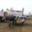

In [26]:
img

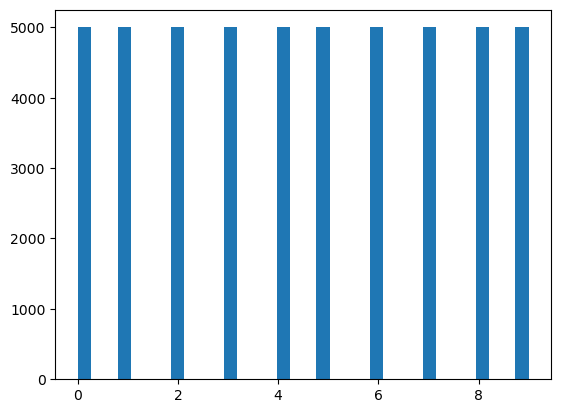

In [27]:
_ = plt.hist( targets_train.numpy(), bins="auto" )
plt.show()

## test data

In [28]:
dataset_test = []
labels_test  = []
targets_test = []

In [29]:
for folder in os.listdir(raw_data_test):
    print(folder)
    ## print( os.path.join(raw_data_train, folder) )
    for image in os.listdir( os.path.join(raw_data_test, folder) ):
        ## print(image)
        if folder not in labels_test:
            labels_test.append(folder)
        targets_test.append( labels_test.index(folder) )
        
        img_arr = imageio.v2.imread(os.path.join(raw_data_test, folder, image), pilmode="RGB")
        ## resize = torchvision.transforms.Resize(size)
        ## crop_center = torchvision.transforms.CenterCrop(size)

        img = torch.from_numpy(img_arr).permute(2, 0, 1).float()
        ## img = resize(img)
        ## img = crop_center(img)
        img /= 255
        dataset_test.append(img)
        

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


In [30]:
data_test    = torch.stack(  dataset_test )
targets_test = torch.Tensor( targets_test ).type( torch.LongTensor )

torch.save( (data_test, targets_test, labels_test) , "CIFAR_train_dataset_test")

In [31]:
data_test.shape

torch.Size([10000, 3, 32, 32])

In [32]:
targets_test.shape

torch.Size([10000])

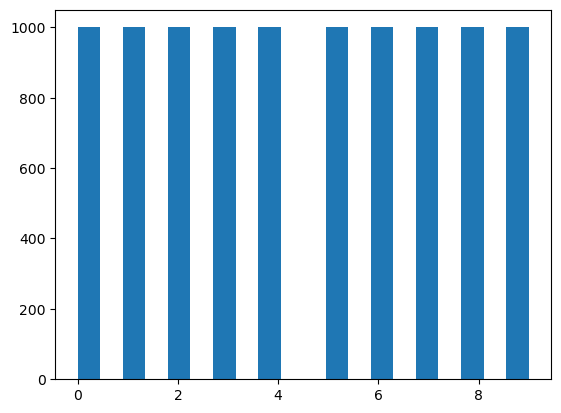

In [33]:
_ = plt.hist( targets_test.numpy(), bins="auto" )
plt.show()

In [34]:

X_train = data_train
y_train = targets_train


In [35]:
X_test = data_test
y_test = targets_test

In [36]:
X_train.shape[0]

50000

In [37]:
y_train[30000].item()

6

In [38]:
CIFAR_train_list = [(X_train[i], y_train[i].item()) for i in range(X_train.shape[0])]

In [39]:
CIFAR_test_list = [(X_test[i], y_test[i].item()) for i in range(X_test.shape[0])]

## data loaders

In [40]:
batch_size = 16

In [41]:
train_dl = torch.utils.data.DataLoader( CIFAR_train_list, batch_size =batch_size, shuffle = True )

In [42]:
test_dl = torch.utils.data.DataLoader( CIFAR_test_list, batch_size = 10000, shuffle = True )

## architectures 

In [43]:
32*32*3

3072

In [75]:
import torch.nn as nn

class DL_Net(nn.Module): 
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear(32*32*3, 256)   # Increased units for better representation
        self.bn1 = nn.BatchNorm1d(256)           # Batch Normalization
        
        self.linear2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        
        self.linear3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        
        self.linear4 = nn.Linear(64, 10)         # Output layer
        
        ## Softmax activation for multi-class classification (applied to output layer)
        self.softmax = nn.Softmax(dim=1)
        
        ## Dropout layer for regularization
        self.dropout = nn.Dropout(0.25)
        
    ## perform inference
    def forward(self, x):
        x = self.linear1(x)
        x = self.bn1(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        
        x = self.linear2(x)
        x = self.bn2(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        
        x = self.linear3(x)
        x = self.bn3(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        
        x = self.linear4(x)
        y_pred = self.softmax(x)  # Softmax activation applied to output layer
        
        return y_pred

In [76]:

def training_loop( N_Epochs, model, loss_fn, opt):
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            xb = xb.view( (16, -1) )
            
            y_pred = model(xb)
            
            loss = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        if epoch % 5 == 0:
            print(epoch, "loss=", loss)


## Core Functions

In [77]:

N_Epochs = 150
learning_rate = .001


In [78]:
print(len(train_dl))

3125


In [79]:
model = DL_Net()

opt = torch.optim.Adam( model.parameters(), lr=learning_rate, )

loss_fn = nn.CrossEntropyLoss()

In [80]:

training_loop( N_Epochs, model, loss_fn, opt )


0 loss= tensor(2.0872, grad_fn=<NllLossBackward0>)
5 loss= tensor(1.9513, grad_fn=<NllLossBackward0>)
10 loss= tensor(1.9592, grad_fn=<NllLossBackward0>)
15 loss= tensor(1.9776, grad_fn=<NllLossBackward0>)
20 loss= tensor(1.8650, grad_fn=<NllLossBackward0>)
25 loss= tensor(1.9723, grad_fn=<NllLossBackward0>)
30 loss= tensor(2.1425, grad_fn=<NllLossBackward0>)
35 loss= tensor(1.9074, grad_fn=<NllLossBackward0>)
40 loss= tensor(1.8998, grad_fn=<NllLossBackward0>)
45 loss= tensor(1.8935, grad_fn=<NllLossBackward0>)
50 loss= tensor(1.6611, grad_fn=<NllLossBackward0>)
55 loss= tensor(1.9879, grad_fn=<NllLossBackward0>)
60 loss= tensor(1.8694, grad_fn=<NllLossBackward0>)
65 loss= tensor(1.8675, grad_fn=<NllLossBackward0>)
70 loss= tensor(2.0629, grad_fn=<NllLossBackward0>)
75 loss= tensor(2.0057, grad_fn=<NllLossBackward0>)
80 loss= tensor(1.8717, grad_fn=<NllLossBackward0>)
85 loss= tensor(2.0226, grad_fn=<NllLossBackward0>)
90 loss= tensor(1.8931, grad_fn=<NllLossBackward0>)
95 loss= tenso

In [81]:
def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred, average='weighted'))
    print('F1-Measure: %.3f' % f1_score(y_true = y_test, y_pred = y_pred, average='weighted'))

In [82]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        batch_size = x_real.shape[0]

        x_real = x_real.view((batch_size,-1))

        y_pred = model(x_real)
        vals, indeces = torch.max(y_pred, dim=1)
        preds = indeces
        print_metrics_function(y_real, preds)

Accuracy: 0.51
Confusion Matrix:
[[560  43  73  24  34  16  19  30 138  63]
 [ 35 625  11  33  16  17  20  22  65 156]
 [ 75  23 398 104 133  70  98  56  15  28]
 [ 39  29  93 331  58 198 131  57  22  42]
 [ 47  12 146  82 424  36 124  83  31  15]
 [ 27  16  85 230  67 389  79  67  16  24]
 [  3  13  95  94  75  52 621  15  13  19]
 [ 27  17  41  76  84  78  35 573  17  52]
 [ 85  69  20  36  32  19  14  15 648  62]
 [ 27 172  13  45  13  24  32  51  67 556]]
Precision: 0.512
Recall: 0.512
F1-Measure: 0.512


In [83]:
rc = data_train[4].view((-1))
rc.shape

torch.Size([3072])

In [84]:
rc = torch.unsqueeze(rc, dim=0)
rc.shape

torch.Size([1, 3072])

In [87]:
model.eval()

DL_Net(
  (linear1): Linear(in_features=3072, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear4): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [88]:

example_label = model( rc )


In [89]:
example_label 

tensor([[9.9997e-01, 2.3897e-07, 4.4034e-08, 2.9986e-14, 1.9597e-09, 1.9303e-16,
         2.5061e-12, 4.3056e-13, 2.8581e-05, 4.5572e-17]],
       grad_fn=<SoftmaxBackward0>)